<a href="https://colab.research.google.com/github/Shadhujan/Baseline_FER/blob/main/Emotion_detection_15052025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Connect with drive data

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import zipfile
from pathlib import Path

# 1. Paths to your zip files
zip_paths = [
    "/content/drive/MyDrive/datasets/fer2013.csv.zip"
]

# 2. Create the dataset directory
dataset_dir = Path("/content/dataset")
dataset_dir.mkdir(parents=True, exist_ok=True)

# 3. Extract each zip
for zp in zip_paths:
    with zipfile.ZipFile(zp, 'r') as archive:
        archive.extractall(dataset_dir)
        print(f"Extracted {zp} ➔ {dataset_dir}")

Extracted /content/drive/MyDrive/datasets/fer2013.csv.zip ➔ /content/dataset


In [4]:
!ls

dataset  drive	sample_data


### Load data

In [5]:
data = pd.read_csv('/content/dataset/fer2013.csv')

In [6]:
data.shape

(35887, 3)

In [7]:
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


### Test an image

In [8]:
np_data = np.array(data)

In [9]:
np_data.shape

(35887, 3)

In [10]:
np_data[0]

array([0,
       '70 80 82 72 58 58 60 63 54 58 60 48 89 115 121 119 115 110 98 91 84 84 90 99 110 126 143 153 158 171 169 172 169 165 129 110 113 107 95 79 66 62 56 57 61 52 43 41 65 61 58 57 56 69 75 70 65 56 54 105 146 154 151 151 155 155 150 147 147 148 152 158 164 172 177 182 186 189 188 190 188 180 167 116 95 103 97 77 72 62 55 58 54 56 52 44 50 43 54 64 63 71 68 64 52 66 119 156 161 164 163 164 167 168 170 174 175 176 178 179 183 187 190 195 197 198 197 198 195 191 190 145 86 100 90 65 57 60 54 51 41 49 56 47 38 44 63 55 46 52 54 55 83 138 157 158 165 168 172 171 173 176 179 179 180 182 185 187 189 189 192 197 200 199 196 198 200 198 197 177 91 87 96 58 58 59 51 42 37 41 47 45 37 35 36 30 41 47 59 94 141 159 161 161 164 170 171 172 176 178 179 182 183 183 187 189 192 192 194 195 200 200 199 199 200 201 197 193 111 71 108 69 55 61 51 42 43 56 54 44 24 29 31 45 61 72 100 136 150 159 163 162 163 170 172 171 174 177 177 180 187 186 187 189 192 192 194 195 196 197 199 200 201 200 197

In [11]:
test_image = np_data[0][1].split(" ")
print(type(test_image))
print(len(test_image))

<class 'list'>
2304


In [12]:
48*48

2304

In [13]:
test_image = np.array(test_image).reshape(48, 48)
test_image.shape

(48, 48)

In [14]:
test_image = test_image.astype('float')

In [15]:
test_image

array([[ 70.,  80.,  82., ...,  52.,  43.,  41.],
       [ 65.,  61.,  58., ...,  56.,  52.,  44.],
       [ 50.,  43.,  54., ...,  49.,  56.,  47.],
       ...,
       [ 91.,  65.,  42., ...,  72.,  56.,  43.],
       [ 77.,  82.,  79., ..., 105.,  70.,  46.],
       [ 77.,  72.,  84., ..., 106., 109.,  82.]])

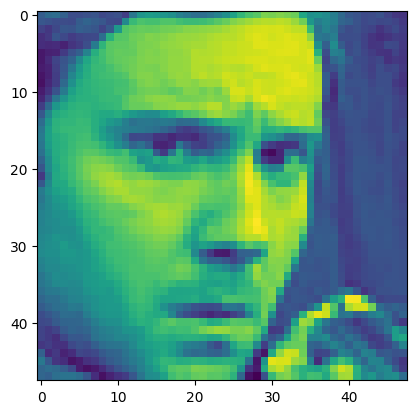

In [16]:
plt.imshow(test_image)

# Data preprocessing

In [17]:
import os
from PIL import Image # Import the Image class from Pillow
import numpy as np

for i in range(len(data)):
  directory = 'data/'+np_data[i][2]+'/'+str(np_data[i][0])
  if not os.path.exists(directory):
    os.makedirs(directory)

  test_image_pixels = np_data[i][1].split(" ")
  test_image_array = np.array(test_image_pixels).reshape(48, 48)
  test_image_array = test_image_array.astype('uint8') # Convert to uint8 for Pillow

  # Use Pillow to create and save the image
  img = Image.fromarray(test_image_array)
  img.save(directory+'/'+str(i)+'.jpg')

In [18]:
!ls data/


PrivateTest  PublicTest  Training


# Training with CNN

In [ ]:
# Downgrade numpy, then restart the Colab runtime:
!pip install --upgrade "numpy<2"
import os, signal; os.kill(os.getpid(), signal.SIGTERM)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 108.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, image_dataset_from_directory
from tensorflow.keras import models, layers, losses, optimizers, metrics
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use this instead of tensorflow.keras.utils.ImageDataGenerator


In [ ]:
#!pip install tensorflow==2.14.0

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator # Use this instead of tensorflow.keras.utils.ImageDataGenerator

train_dir = 'data/Training'
validation_dir = 'data/PublicTest'
test_dir ='data/PrivateTest'


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    shuffle=True  # it will loop forever
)
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    shuffle=False
)



Found 28709 images belonging to 7 classes.
Found 3589 images belonging to 7 classes.


NameError: name 'test_generator' is not defined

In [ ]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(64, (3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 4096)              0

In [ ]:
model.compile(optimizer=optimizers.RMSprop(),
              loss=losses.categorical_crossentropy,
              metrics=['accuracy']
             )

import math, os

batch_size = 32

# count how many images are in your training dir
num_train_imgs = sum(
    len(files)
    for _, _, files in os.walk(train_dir)
)

# count how many images are in your validation dir
num_val_imgs = sum(
    len(files)
    for _, _, files in os.walk(validation_dir)
)

# compute how many batches (steps) that corresponds to
train_steps = math.ceil(num_train_imgs / batch_size)
val_steps   = math.ceil(num_val_imgs   / batch_size)

print(f"train_steps = {train_steps}, val_steps = {val_steps}")

# now call fit with the correct numbers
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=val_steps
)


train_steps = 898, val_steps = 113
Epoch 1/30
898/898 [==============================] - 87s 96ms/step - loss: 1.3125 - accuracy: 0.5019 - val_loss: 1.2946 - val_accuracy: 0.4923
Epoch 2/30
898/898 [==============================] - 87s 97ms/step - loss: 1.1795 - accuracy: 0.5566 - val_loss: 1.2319 - val_accuracy: 0.5333
Epoch 3/30
898/898 [==============================] - 85s 95ms/step - loss: 1.0655 - accuracy: 0.6032 - val_loss: 1.1989 - val_accuracy: 0.5430
Epoch 4/30
898/898 [==============================] - 88s 97ms/step - loss: 0.9516 - accuracy: 0.6490 - val_loss: 1.2541 - val_accuracy: 0.5397
Epoch 5/30
898/898 [==============================] - 85s 95ms/step - loss: 0.8219 - accuracy: 0.6990 - val_loss: 1.2718 - val_accuracy: 0.5612
Epoch 6/30
898/898 [==============================] - 87s 97ms/step - loss: 0.6887 - accuracy: 0.7533 - val_loss: 1.4063 - val_accuracy: 0.5539
Epoch 7/30
898/898 [==============================] - 83s 93ms/step - loss: 0.5521 - accuracy: 0.8026

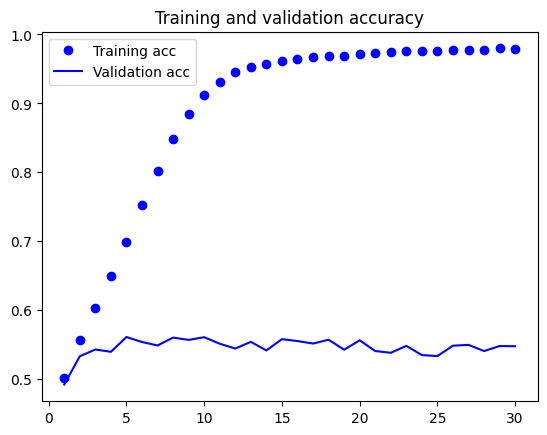

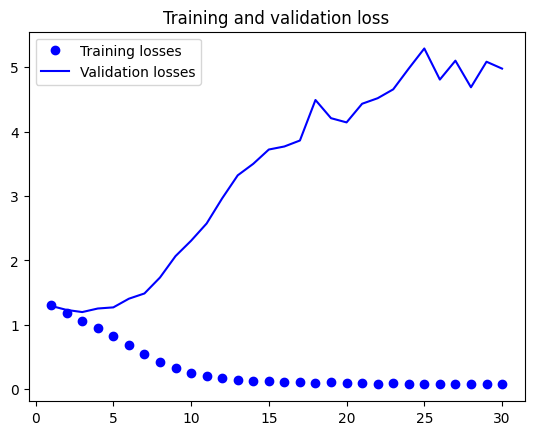

In [ ]:
import matplotlib.pyplot as plt

# Change 'acc' to 'accuracy' and 'val_acc' to 'val_accuracy'
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Save your training history**

In [ ]:
import json

hist_path = '/content/drive/MyDrive/emotion_history3.json'
with open(hist_path, 'w') as f:
    json.dump(history.history, f)

Later, in any new session, you can reload it:

In [ ]:
import json
with open('/content/drive/MyDrive/emotion_history.json') as f:
    history_dict = json.load(f)
# now history_dict['accuracy'], etc. are available

# **Optional**

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

checkpoint_cb = ModelCheckpoint(
    '/content/drive/MyDrive/checkpoints/emotion_weights_{epoch:02d}.h5',
    save_weights_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    save_best_only=False
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=val_steps,
    callbacks=[checkpoint_cb]
)

#That way if your session times out after epoch 12, you still have a weights file for epochs 1…12 on Drive.


## Try using pretrined model

In [ ]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top=False,
                 input_shape=(48, 48, 3))

In [ ]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,980,935 (57.15 MB)

 Trainable params: 14,980,935 (57.15 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
conv_base.trainable = False
print('This is the number of trainable weights before freezing the conv base:', len(model.trainable_weights))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

import math, os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 32

# count how many images are in your training dir
num_train_imgs = sum(
    len(files)
    for _, _, files in os.walk(train_dir)
)

# count how many images are in your validation dir
num_val_imgs = sum(
    len(files)
    for _, _, files in os.walk(validation_dir)
)

# compute how many batches (steps) that corresponds to
train_steps = math.ceil(num_train_imgs / batch_size)
val_steps   = math.ceil(num_val_imgs   / batch_size)

print(f"train_steps = {train_steps}, val_steps = {val_steps}")

# set up a checkpoint callback
checkpoint_cb = ModelCheckpoint(
    filepath='/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_{epoch:02d}.h5',
    save_weights_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    save_best_only=False,        # set True to save only when val_accuracy improves
    verbose=1
)

# now call fit with the checkpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=val_steps,
    callbacks=[checkpoint_cb]
)


This is the number of trainable weights before freezing the conv base: 4
train_steps = 898, val_steps = 113
Epoch 1/30
898/898 [==============================] - ETA: 0s - loss: 1.5786 - categorical_accuracy: 0.3870
Epoch 1: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_01.h5
898/898 [==============================] - 727s 809ms/step - loss: 1.5786 - categorical_accuracy: 0.3870 - val_loss: 1.5696 - val_categorical_accuracy: 0.3965
Epoch 2/30
898/898 [==============================] - ETA: 0s - loss: 1.5512 - categorical_accuracy: 0.4030
Epoch 2: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_02.h5
898/898 [==============================] - 706s 787ms/step - loss: 1.5512 - categorical_accuracy: 0.4030 - val_loss: 1.5559 - val_categorical_accuracy: 0.3973
Epoch 3/30
898/898 [==============================] - ETA: 0s - loss: 1.5326 - categorical_accuracy: 0.4111
Epoch 3: saving model to /content/drive/MyDrive/checkpoi

Restart the model process


In [3]:
from keras import models, layers, optimizers, losses, metrics
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(48, 48, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(7, activation='softmax'))

conv_base.trainable = False

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model.load_weights('/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_45.weights.h5')


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
import math, os

batch_size = 32

num_train_imgs = sum(len(files) for _, _, files in os.walk(train_dir))
num_val_imgs   = sum(len(files) for _, _, files in os.walk(validation_dir))

train_steps = math.ceil(num_train_imgs / batch_size)
val_steps   = math.ceil(num_val_imgs   / batch_size)

checkpoint_cb = ModelCheckpoint(
    filepath='/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    save_best_only=False,
    verbose=1
)

history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=30,            # this is the total number of epochs
    initial_epoch=12,     # resume from here
    callbacks=[checkpoint_cb]
)


Epoch 13/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 948ms/step - categorical_accuracy: 0.4592 - loss: 1.4281
Epoch 13: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_13.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 957s 1s/step - categorical_accuracy: 0.4592 - loss: 1.4281 - val_categorical_accuracy: 0.4302 - val_loss: 1.5014
Epoch 14/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 952ms/step - categorical_accuracy: 0.4635 - loss: 1.4220
Epoch 14: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_14.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 961s 1s/step - categorical_accuracy: 0.4635 - loss: 1.4220 - val_categorical_accuracy: 0.4324 - val_loss: 1.4960
Epoch 15/30
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 939ms/step - categorical_accuracy: 0.4671 - loss: 1.4114
Epoch 15: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_epoch_15.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 972s 1s/step - categorical_accuracy: 0.4671 - loss: 1.4114 - val_categorical_a

now it connected, can continue other work

In [5]:
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [6]:
model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-5),
    loss=losses.categorical_crossentropy,
    metrics=[metrics.categorical_accuracy]
)

import math, os
from tensorflow.keras.callbacks import ModelCheckpoint

batch_size = 32

# count how many images are in your training dir
num_train_imgs = sum(
    len(files)
    for _, _, files in os.walk(train_dir)
)

# count how many images are in your validation dir
num_val_imgs = sum(
    len(files)
    for _, _, files in os.walk(validation_dir)
)

# compute how many batches (steps) that corresponds to
train_steps = math.ceil(num_train_imgs / batch_size)
val_steps   = math.ceil(num_val_imgs   / batch_size)

print(f"train_steps = {train_steps}, val_steps = {val_steps}")

# set up a checkpoint callback
checkpoint_cb = ModelCheckpoint(
    filepath='/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_{epoch:02d}.weights.h5',
    save_weights_only=True,
    save_freq='epoch',
    monitor='val_accuracy',
    save_best_only=False,        # set True to save only when val_accuracy improves
    verbose=1
)

# now call fit with the checkpoint callback
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps,
    validation_data=validation_generator,
    validation_steps=val_steps,
    epochs=60,           # total epochs you now want
    initial_epoch=45,    # resume _after_ epoch 30
    callbacks=[checkpoint_cb]
)

train_steps = 898, val_steps = 113
Epoch 46/60


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


896/898 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - categorical_accuracy: 0.9208 - loss: 0.2947
Epoch 46: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_46.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 27s 24ms/step - categorical_accuracy: 0.9208 - loss: 0.2947 - val_categorical_accuracy: 0.5458 - val_loss: 1.5277
Epoch 47/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9348 - loss: 0.2587
Epoch 47: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_47.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - categorical_accuracy: 0.9348 - loss: 0.2587 - val_categorical_accuracy: 0.5570 - val_loss: 1.5547
Epoch 48/60
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - categorical_accuracy: 0.9484 - loss: 0.2208
Epoch 48: saving model to /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_48.weights.h5
898/898 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - categorical_accuracy: 0.9484 - loss: 0.2208 -

In [8]:
import json

hist_path = '/content/drive/MyDrive/emotion_history_2.json'
with open(hist_path, 'w') as f:
    json.dump(history.history, f)

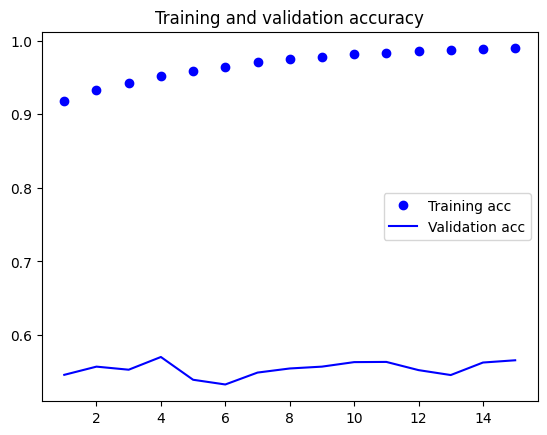

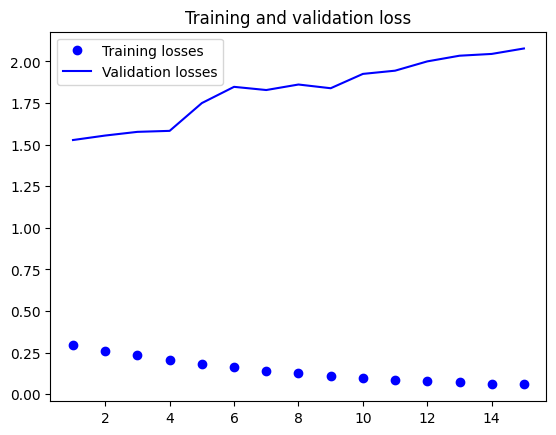

In [12]:
import matplotlib.pyplot as plt

acc = history.history['categorical_accuracy']
val_acc = history.history['val_categorical_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training losses')
plt.plot(epochs, val_loss, 'b', label='Validation losses')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [25]:
model.save('finetuning_on_pretrained_vgg16_finetuned.h5')

In [27]:
from google.colab import files
files.download('/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_60.weights.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Predictive system**

In [22]:
# prompt: add to show model accuracy

# Evaluate the model on the test set
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(48, 48),
    batch_size=32,
    shuffle=False
)

# count how many images are in your test dir
num_test_imgs = sum(
    len(files)
    for _, _, files in os.walk(test_dir)
)

# compute how many batches (steps) that corresponds to
test_steps   = math.ceil(num_test_imgs   / batch_size)

print(f"test_steps = {test_steps}")

print("Evaluating model on the test set...")
loss, accuracy = model.evaluate(test_generator, steps=test_steps)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Found 3589 images belonging to 7 classes.
test_steps = 113
Evaluating model on the test set...
113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - categorical_accuracy: 0.5536 - loss: 2.1285
Test Loss: 1.9384
Test Accuracy: 0.5879


In [29]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # use TensorFlow’s Keras on Kaggle

# 1) CONFIG
MODEL_PATH = '/content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_60.weights.h5'
IMG_SIZE   = (48, 48)
CLASS_INDICES = {
    0: 'Happy',
    1: 'Sad',
    2: 'Angry',
    3: 'Surprised',
    4: 'Neutral',
    5: 'Fearful',
    6: 'Disgusted'
}

# 2) LOAD MODEL
model = load_model(MODEL_PATH)
print(f"Loaded model from {MODEL_PATH}")

# 3) PREDICTION FUNCTION
def predict_emotion(image_path):
    # 3a) Read & preprocess
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(img_rgb, IMG_SIZE).astype('unit8') / 255.0
    batch = np.expand_dims(resized, axis=0)
    # 3b) Inference
    probs = model.predict(batch)[0]
    idx   = np.argmax(probs)
    return img_rgb, CLASS_INDICES[idx], probs[idx]

# 4) RUN & DISPLAY
image_path = '/content/drive/MyDrive/datasets/test/HappyKid.jpg'
img_rgb, emotion, confidence = predict_emotion(image_path)

plt.figure(figsize=(5,5))
plt.imshow(img_rgb)
plt.axis('off')
plt.title(f"Prediction: {emotion} ({confidence*100:.2f}%)")
plt.show()


ValueError: No model config found in the file at /content/drive/MyDrive/checkpoints/emotion_weights_on_vgg16_cbtOn_epoch_60.weights.h5.